In [ ]:
Notebook to get and clean the data of Lyon Capitale about Covid19 vaccination

In [8]:
from helpers import *

In [20]:
# Clean function in order to eliminate characters like \n or \n\n after scraping
def preprocessor(text):
#     text = str(text).lower()
    
#     text = re.sub('https?://\S+|www\.\S+', '', text)
#     text = re.sub('<.*?>+', '', text)
#     text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n\n', '', text)
    text = re.sub('\'','', text)
    text = re.sub('\n', '', text)
    text = re.sub('\xad', '', text)
    text = re.sub('\u2009', '', text)
    text = re.sub('\u200b', '', text)
    text = re.sub('\xa0', '', text)
    
    
#     text = re.sub('\w*\d\w*', '', text)
    return text

## LYON CAPITALE

In [131]:
#Install Driver
# Versión Chrome 89.0.4389.114 (Build oficial) (64 bits)
driver = webdriver.Chrome(ChromeDriverManager().install())



====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST driver version for 96.0.4664
Driver [/home/david/.wdm/drivers/chromedriver/linux64/96.0.4664.45/chromedriver] found in cache


In [6]:
search_url='https://www.lyoncapitale.fr/'
email = ''
password = ''
driver.get(search_url)
driver.maximize_window() 
time.sleep(1)
#cookkies

In [3]:
# There are 56 pages of vaccination after 2020: 
list_search_url =[]

for i in range(1, 57):
    list_search_url.append(f"https://www.lyoncapitale.fr/page/{i}?s=vaccination")

In [9]:
list_links_lyon=[]
for i in list_search_url: 
    driver.get(i)
    links = driver.find_elements_by_xpath('//h2/a')
    for j in links: 
        list_links_lyon.append(j.get_attribute('href'))

In [12]:
# Store the list in a document
with open("list_links_vacunacion_lyon.txt", 'w') as f:
    for s in list_links_lyon:
        f.write(str(s) + '\n')

In [13]:
with open("list_links_vacunacion_lyon.txt", 'r') as f:
    list_links_lyon= [line.rstrip('\n') for line in f]

In [15]:
list_links_lyon

['https://www.lyoncapitale.fr/actualite/covid-19-a-lyon-schema-vaccinal-complet-3e-dose-ou-en-est-la-vaccination-dans-le-rhone',
 'https://www.lyoncapitale.fr/actualite/covid-19-a-lyon-vers-une-montee-en-puissance-de-la-vaccination-dans-le-rhone',
 'https://www.lyoncapitale.fr/actualite/covid-19-le-centre-de-vaccination-d-ecully-devait-fermer-le-23-decembre-il-va-rester-ouvert',
 'https://www.lyoncapitale.fr/actualite/covid-19-a-lyon-la-haute-autorite-scientifique-recommande-la-vaccination-des-5-11-ans',
 'https://www.lyoncapitale.fr/actualite/metropole-de-lyon-la-vaccination-contre-le-covid-19-de-retour-au-groupama-stadium',
 'https://www.lyoncapitale.fr/actualite/drome-le-centre-de-vaccination-de-montelimar-agrandit-ses-horaires',
 'https://www.lyoncapitale.fr/actualite/covid-19-l-universite-lyon-3-organise-une-journee-de-vaccination-le-23-novembre',
 'https://www.lyoncapitale.fr/actualite/vaccination-obligatoire-contre-le-covid-19-des-soignants-appellent-a-un-rassemblement-de-soutie

In [16]:
def get_html_lyon(list_links):
    #Count
    extracted_articles=0 
    for i in list_links: 
        driver.get(i)
        html = driver.page_source
        tail=i.split('/')[-1]
        extracted_articles += 1
        with open(f'/home/david/Escritorio/VACTINATION_PROJECT/HTMLs/LYON_CAPITALE/{tail}.txt', 'w') as f: 
            f.write(html)
        print(f'Extracted articles: {extracted_articles} of {len(list_links)}',end='\r')
        time.sleep(1)

In [17]:
get_html_lyon(list_links_lyon)

In [3]:
import os
list_articles_lyon=[]
for filename in os.listdir("/home/david/Escritorio/VACCINATION_PROJECT/HTMLs/LYON_CAPITALE/"):
    with open(os.path.join("/home/david/Escritorio/VACCINATION_PROJECT/HTMLs/LYON_CAPITALE/", filename), 'r') as f:
        html_file = f.read()
    list_text=[]
    soup = BeautifulSoup(html_file, 'html.parser')
    try:
        #The first one is the name of the newspaper, so we take the second one
        title=soup.find("h1",class_="titrearticle").text.strip()
    except: 
        title="error"
    try:
        author=soup.find(class_='author vcard').text.strip()
    except: 
        author = "error"
    try:
        link=soup.find('link', rel='canonical')['href']
    except: 
        link="error"
    try:
        subheadline= soup.find("h2").text.strip()
    except: 
        subheadline="error"
    try:
        date= soup.time.attrs['datetime']
    except: 
        date="error"
    try:
        tweets = soup.find_all(attrs={"dir" : "ltr"})
        for tweet in tweets:
            tweet.decompose()
    except: 
        pass
    try:
        if soup.find("div",class_="entry-content contenu-post").find("ul"):
            soup.find("div", class_='addtoany_share_save_container addtoany_content addtoany_content_bottom').decompose()
            soup.find("h2").decompose()
            text=soup.find("div",class_="entry-content contenu-post").get_text().strip()
        else:
            tf=soup.find("div",class_="entry-content contenu-post").find_all("p")
            if len(tf)>2:
                tf.pop()
            for p in tf:
                list_text.append(p.get_text().strip())
            text=' '.join(list_text).strip()
    except: 
        text="error"
    list_articles_lyon.append({'Title': title, 
                          'Subheadline':subheadline,
                          'Text':text,
                          'Authors': author, 
                          'Date': date,
                          'Link':link}) 


In [21]:
articles_lyon_capitale = pd.DataFrame.from_dict(list_articles_lyon)

In [22]:
articles_lyon_capitale

,Title,Subheadline,Text,Authors,Date,Link
0,Covid-19 : à partir de quand le pass sanitaire...,Emmanuel Macron a annoncé mardi soir que les +...,Si 50 millions de Français sont totalement vac...,Anthony Faure,2021-11-10T10:05:16+01:00,https://www.lyoncapitale.fr/actualite/covid-19...
1,Coronavirus à Lyon : la région a passé la barr...,Sur les 8M d'habitants de la grande région Auv...,La campagne de vaccination s'accélère dans la ...,Anthony Faure,2021-04-26T11:55:59+02:00,https://www.lyoncapitale.fr/actualite/coronavi...
2,"Grippe A : une école fermée à Villeurbanne, bi...",error,"La préfecture, sur proposition de la Dass du R...",Blanchard Lucie,2009-10-15T21:01:17+02:00,https://www.lyoncapitale.fr/actualite/grippe-a...
3,Covid 19 : Sanofi annonce un vaccin pour la fi...,"Ce lundi matin, le laboratoire français a publ...",Après avoir rencontré des problèmes lors des p...,Hadrien Jame,2021-05-17T11:43:01+02:00,https://www.lyoncapitale.fr/actualite/covid-19...
4,"""C'est n'importe quoi !"" : à Lyon, les centres...",La journée du lundi 16 août a marqué l'entrée ...,"""C'est n'importe quoi cette obligation du pass...",Jeanne Le Bihan,2021-08-17T07:00:45+02:00,https://www.lyoncapitale.fr/actualite/c-est-n-...
...,...,...,...,...,...,...
550,Covid-19 : le point sur l'épidémie ce lundi 1e...,Légère hausse du nombre de nouveaux cas de cov...,La circulation du virus à l'instant t sur un t...,Anthony Faure,2021-11-01T08:59:18+01:00,https://www.lyoncapitale.fr/actualite/covid-19...
551,"Lyon : à la Duchère, la vaccination sans rende...",Une opération de vaccination est organisée les...,"Le rendez-vous nous avait été donné à 11h30. ""...",Marie Allenou,2021-07-22T07:00:11+02:00,https://www.lyoncapitale.fr/actualite/lyon-a-l...
552,Coronavirus : le nombre de nouveaux cas contin...,"Depuis le 15 août, le nombre de nouveaux cas d...",Après une grosse retombée fin juillet puis un ...,Anthony Faure,2021-08-27T08:54:54+02:00,https://www.lyoncapitale.fr/actualite/coronavi...
553,Coronavirus à Lyon : plus de 250 000 personnes...,"13,5 % de la population du département du Rhôn...",La campagne de vaccination s'accélère dans le ...,Anthony Faure,2021-04-08T10:56:37+02:00,https://www.lyoncapitale.fr/actualite/coronavi...


## clean text

In [23]:
# clean text
articles_lyon_capitale['Text']=articles_lyon_capitale['Text'].apply(preprocessor)
articles_lyon_capitale['Title']=articles_lyon_capitale['Title'].apply(preprocessor)
articles_lyon_capitale['Subheadline']=articles_lyon_capitale['Subheadline'].apply(preprocessor)

In [24]:
articles_lyon_capitale['Newspaper']= 'Lyon Capitale'
articles_lyon_capitale['Country']= 'France'
articles_lyon_capitale['n_words'] = articles_lyon_capitale.Text.apply(lambda x: len(str(x).split(' ')))

In [25]:
articles_lyon_capitale=articles_lyon_capitale.drop(articles_lyon_capitale[articles_lyon_capitale['Date']<'2020-01-01'].index, inplace=False)
#Just 10 articles of premium, it doesnt make sense to take the premium
articles_lyon_capitale=articles_lyon_capitale.drop(articles_lyon_capitale[articles_lyon_capitale['Text'].str.contains('Article réservé à nos abonnés')].index,inplace=False)
articles_lyon_capitale=articles_lyon_capitale.drop(articles_lyon_capitale[articles_lyon_capitale['n_words']<10].index,inplace=False)

In [26]:
articles_lyon_capitale=articles_lyon_capitale.drop_duplicates()
articles_lyon_capitale=articles_lyon_capitale[articles_lyon_capitale.Text.str.contains("vacc|pass")|articles_lyon_capitale.Subheadline.str.contains("vacc|pass")|articles_lyon_capitale.Title.str.contains("vacc|pass")]

In [27]:
articles_lyon_capitale.sort_values('n_words')

,Title,Subheadline,Text,Authors,Date,Link,Newspaper,Country,n_words
476,Vaccin: plus de 92% des personnes âgées de + d...,"Dans le Rhône et la Métropole de Lyon, plus de...",Lyon Capitale a fait des points très régulière...,Anthony Faure,2021-10-06T10:23:40+02:00,https://www.lyoncapitale.fr/actualite/vaccin-p...,Lyon Capitale,France,27
133,Coronavirus à Lyon: la vaccination finalement ...,La vaccination contre le Covid-19 sera ouverte...,"Les professions prioritaires, publiques ou pri...",Anthony Faure,2021-05-20T17:33:24+02:00,https://www.lyoncapitale.fr/actualite/coronavi...,Lyon Capitale,France,28
248,"Lyon: le Premier ministre, Jean Castex, en vis...","Le Premier Ministre, Jean Castex, est en visit...",Jean Castex sera à Lyon samedi matin. Il visit...,Anthony Faure,2021-04-09T19:13:18+02:00,https://www.lyoncapitale.fr/actualite/lyon-le-...,Lyon Capitale,France,28
528,"Coronavirus: point vaccination ce lundi, 6 mil...",Plus de 6M de Français ont reçu une première d...,"Cela représente environ 9,2% de la population....",Anthony Faure,2021-03-22T09:46:29+01:00,https://www.lyoncapitale.fr/actualite/coronavi...,Lyon Capitale,France,29
339,Les Hospices civiles de Lyon réorganisent les ...,"À partir du 4 juillet, le centre de vaccinatio...",Le centre de vaccination au Palais des Sports ...,Marie Allenou,2021-07-02T11:25:21+02:00,https://www.lyoncapitale.fr/actualite/les-hosp...,Lyon Capitale,France,38
...,...,...,...,...,...,...,...,...,...
389,Dix jours après l’entrée en vigueur du pass sa...,Contrôlé depuis le 9 août dans les cafés et re...,"Après les cinémas, les musées ou encore les es...",Hadrien Jame,2021-08-20T07:00:23+02:00,https://www.lyoncapitale.fr/actualite/dix-jour...,Lyon Capitale,France,1995
297,Covid-19 à Lyon: le plan blanc n’est pas à l’o...,Alors que la courbe du taux d’incidence baisse...,"Depuis une dizaine de jours, le nombre de nouv...",Hadrien Jame,2021-08-12T07:00:49+02:00,https://www.lyoncapitale.fr/actualite/covid-19...,Lyon Capitale,France,2088
237,"Lyon: au procès des antifascistes, la politiqu...","Jeudi 4 novembre, le tribunal a prononcé des r...","Explosion de joie au tribunal judiciaire. ""Lyo...",Marie Allenou,2021-11-05T14:58:05+01:00,https://www.lyoncapitale.fr/actualite/lyon-au-...,Lyon Capitale,France,2126
238,Coronavirus: que pensent les députés du Rhône ...,"Lundi 26 juillet, lAssemblée nationale a adopt...",Sur les quatorze députés que compte le départe...,Jeanne Le Bihan,2021-07-26T11:28:29+02:00,https://www.lyoncapitale.fr/actualite/coronavi...,Lyon Capitale,France,2216


In [28]:
import datetime
from datetime import datetime

# DATE
for index,row in articles_lyon_capitale.iterrows(): 
    try:
        articles_lyon_capitale['Date'][index] =datetime.strptime(articles_lyon_capitale['Date'][index][:19], '%Y-%m-%dT%H:%M:%S').date()
    except: 
        continue
articles_lyon_capitale['Date'] = pd.to_datetime(articles_lyon_capitale['Date'])

/tmp/ipykernel_60774/3620458591.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles_lyon_capitale['Date'][index] =datetime.strptime(articles_lyon_capitale['Date'][index][:19], '%Y-%m-%dT%H:%M:%S').date()


In [29]:
articles_lyon_capitale.sort_values('Date')

,Title,Subheadline,Text,Authors,Date,Link,Newspaper,Country,n_words
403,Traitements et vaccins: les laboratoires de Ly...,Terre du premier cluster haut-savoyard infecti...,"Début mars, le coronavirus semble encore loin ...",Antoine Sillières,2020-04-06,https://www.lyoncapitale.fr/actualite/traiteme...,Lyon Capitale,France,2405
189,Coronavirus à Lyon: comment adopter un animal ...,"Les adoptions de chiens, chats, ou NAC vont po...",Le confinement et le coronavirus ont mis la SP...,Florent Deligia,2020-04-14,https://www.lyoncapitale.fr/actualite/coronavi...,Lyon Capitale,France,277
369,Lyon: des chercheurs confirment le lien entre ...,Une étude publiée par les Hospices civils de L...,Dans une étude publiée dans la revue internati...,Justin Boche,2020-05-19,https://www.lyoncapitale.fr/actualite/lyon-des...,Lyon Capitale,France,311
479,"Coronavirus à Lyon: ""pas de vaccin avant le 2e...",Lépidémie continue sa progression en France et...,"Bruno Lina, virologue lyonnais, responsable du...",Anthony Faure,2020-09-21,https://www.lyoncapitale.fr/actualite/coronavi...,Lyon Capitale,France,110
12,Des députés lyonnais appellent à une vaccinati...,Plusieurs députés du Rhône ont appelé à une va...,"Jean-Louis Touraine, Anne Brugnera, Thomas Rud...",Justin Boche,2020-09-21,https://www.lyoncapitale.fr/actualite/des-depu...,Lyon Capitale,France,143
...,...,...,...,...,...,...,...,...,...
21,"Covid-19 à Lyon: vers une ""montée en puissance...","En une dizaine de jours, les contaminations à ...",On le sait depuis maintenant plusieurs semaine...,Hadrien Jame,2021-11-30,https://www.lyoncapitale.fr/actualite/covid-19...,Lyon Capitale,France,908
236,Covid-19 à Lyon: la Haute Autorité Scientifiqu...,"Ce mardi 30 novembre, la Haute Autorité Scient...",La Haute Autorité de santé (HAS) a donné son f...,Loris Lacroix,2021-11-30,https://www.lyoncapitale.fr/actualite/covid-19...,Lyon Capitale,France,354
522,Covid-19: le centre de vaccination dEcully dev...,Le centre de vaccination dEcully rouvrira fina...,"Après les nouvelles annonces gouvernementales,...",Anthony Faure,2021-11-30,https://www.lyoncapitale.fr/actualite/covid-19...,Lyon Capitale,France,175
203,"Covid-19 à Lyon: schéma vaccinal complet, 3e d...",Le Rhône fait partie des départements où le vi...,"Avec un taux d’incidence de 444, qui met en év...",Hadrien Jame,2021-12-01,https://www.lyoncapitale.fr/actualite/covid-19...,Lyon Capitale,France,399


In [30]:
articles_lyon_capitale.to_csv(r'/home/david/Escritorio/VACCINATION_PROJECT/DF_HTML_VERSION/articles_lyon_capitale_01_12_21.csv', index = False)

In [207]:
****************************************************************************************************

In [9]:
df = pd.read_csv('/home/david/Escritorio/VACCINATION_PROJECT/DF_HTML_VERSION/articles_lyon_capitale_01_12_21.csv')

In [10]:
df.sort_values('Date')

,Title,Subheadline,Text,Authors,Date,Link,Newspaper,Country,n_words
323,Traitements et vaccins: les laboratoires de Ly...,Terre du premier cluster haut-savoyard infecti...,"Début mars, le coronavirus semble encore loin ...",Antoine Sillières,2020-04-06,https://www.lyoncapitale.fr/actualite/traiteme...,Lyon Capitale,France,2405
150,Coronavirus à Lyon: comment adopter un animal ...,"Les adoptions de chiens, chats, ou NAC vont po...",Le confinement et le coronavirus ont mis la SP...,Florent Deligia,2020-04-14,https://www.lyoncapitale.fr/actualite/coronavi...,Lyon Capitale,France,277
296,Lyon: des chercheurs confirment le lien entre ...,Une étude publiée par les Hospices civils de L...,Dans une étude publiée dans la revue internati...,Justin Boche,2020-05-19,https://www.lyoncapitale.fr/actualite/lyon-des...,Lyon Capitale,France,311
381,"Coronavirus à Lyon: ""pas de vaccin avant le 2e...",Lépidémie continue sa progression en France et...,"Bruno Lina, virologue lyonnais, responsable du...",Anthony Faure,2020-09-21,https://www.lyoncapitale.fr/actualite/coronavi...,Lyon Capitale,France,110
6,Des députés lyonnais appellent à une vaccinati...,Plusieurs députés du Rhône ont appelé à une va...,"Jean-Louis Touraine, Anne Brugnera, Thomas Rud...",Justin Boche,2020-09-21,https://www.lyoncapitale.fr/actualite/des-depu...,Lyon Capitale,France,143
...,...,...,...,...,...,...,...,...,...
13,"Covid-19 à Lyon: vers une ""montée en puissance...","En une dizaine de jours, les contaminations à ...",On le sait depuis maintenant plusieurs semaine...,Hadrien Jame,2021-11-30,https://www.lyoncapitale.fr/actualite/covid-19...,Lyon Capitale,France,908
188,Covid-19 à Lyon: la Haute Autorité Scientifiqu...,"Ce mardi 30 novembre, la Haute Autorité Scient...",La Haute Autorité de santé (HAS) a donné son f...,Loris Lacroix,2021-11-30,https://www.lyoncapitale.fr/actualite/covid-19...,Lyon Capitale,France,354
418,Covid-19: le centre de vaccination dEcully dev...,Le centre de vaccination dEcully rouvrira fina...,"Après les nouvelles annonces gouvernementales,...",Anthony Faure,2021-11-30,https://www.lyoncapitale.fr/actualite/covid-19...,Lyon Capitale,France,175
162,"Covid-19 à Lyon: schéma vaccinal complet, 3e d...",Le Rhône fait partie des départements où le vi...,"Avec un taux d’incidence de 444, qui met en év...",Hadrien Jame,2021-12-01,https://www.lyoncapitale.fr/actualite/covid-19...,Lyon Capitale,France,399


# NER

In [221]:
df_ner= ner(df.Text,"fr_core_news_sm")

In [222]:
df_ner=df_ner.groupby(['Entity','Label']).size().reset_index(name='Frequency')

In [223]:
#Eliminate wrong entitites
list_wrong_entities=['l’', 'n’','L’','c’','C’','l’','–','jusqu’']
df_ner=df_ner[~df_ner.Entity.isin(list_wrong_entities)]

Text(0.5, 1.0, 'Most frequent NE PERSON')

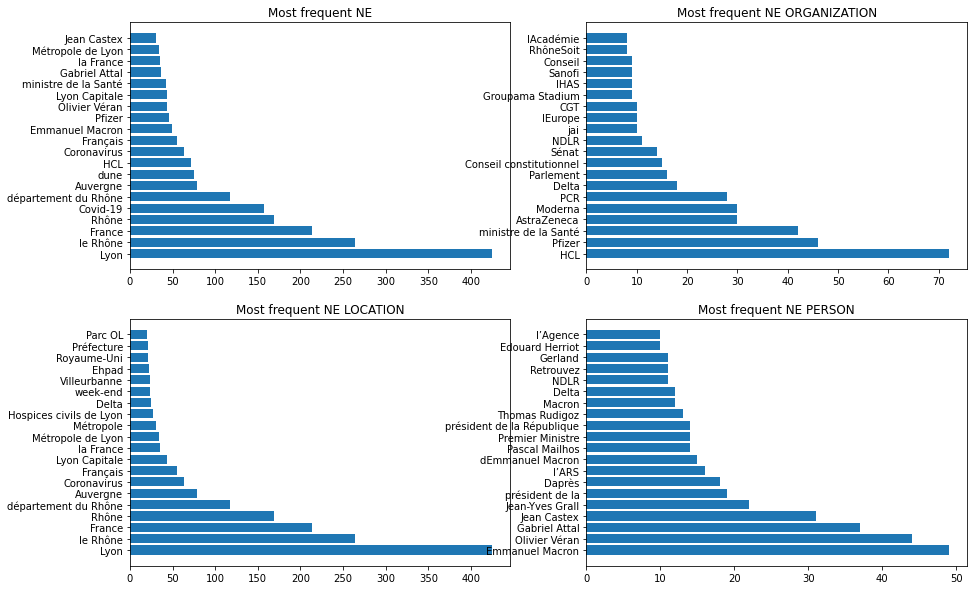

In [224]:
fig, axs = plt.subplots(2, 2,figsize=(15,10))
axs[0, 0].barh(y=df_ner.sort_values('Frequency',ascending=False).head(20)['Entity'],width=df_ner.sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[0,0].set_title('Most frequent NE')
axs[0, 1].barh(y=df_ner[df_ner['Label']=="ORG"].sort_values('Frequency',ascending=False).head(20)['Entity'], width=df_ner[df_ner['Label']=="ORG"].sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[0,1].set_title('Most frequent NE ORGANIZATION')
axs[1, 0].barh(y=df_ner[df_ner['Label']=="LOC"].sort_values('Frequency',ascending=False).head(20)['Entity'], width=df_ner[df_ner['Label']=="LOC"].sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[1,0].set_title('Most frequent NE LOCATION')
axs[1, 1].barh(y=df_ner[df_ner['Label']=="PER"].sort_values('Frequency',ascending=False).head(20)['Entity'], width=df_ner[df_ner['Label']=="PER"].sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[1,1].set_title('Most frequent NE PERSON')